In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
##H2O gas
A=30.092
B=6.832
C=6.793
D=-2.53448
E=0.082139

delta_H298=-241.826  #kJ/mol
delta_S298=188.835   #J/mol-K

dT=0.001
T=np.arange(300,400,dT)
t=T/1000
Cp_H2O_gas=A+B*t+C*t**2+D*t**3+E/t**2
deltaH_gas=np.cumsum(Cp_H2O_gas*dT)+delta_H298*1000
deltaS_gas=np.cumsum(Cp_H2O_gas/T*dT)+delta_S298
deltaG_gas=deltaH_gas-T*deltaS_gas

In [25]:
##H2Oliquida

A=-203.606
B=1523.290
C=-3196.413
D=2474.455
E=3.855

delta_H298=-285.830  #kJ/mol
delta_S298=69.95   #J/mol-K

dT=0.001
T=np.arange(300,400,dT)
t=T/1000
Cp_H2O_liq=A+B*t+C*t**2+D*t**3+E/t**2
deltaH_liq=np.cumsum(Cp_H2O_liq*dT)+delta_H298*1000
deltaS_liq=np.cumsum(Cp_H2O_liq/T*dT)+delta_S298
deltaG_liq=deltaH_liq-T*deltaS_liq

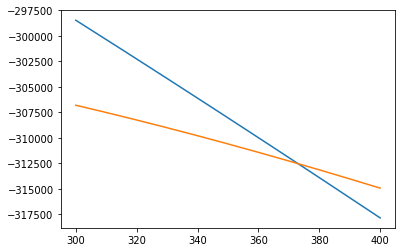

In [26]:
plt.plot(T,deltaG_gas)
plt.plot(T,deltaG_liq)
plt.show()

In [27]:
dp=(deltaG_gas-deltaG_liq)**2
minimo=np.min(dp)
np.where(dp==minimo)

(array([73026]),)

In [28]:
T[73026]

373.02599999827316

In [30]:
import requests

In [ ]:
def leerArchivo(path):
path='N-007.txt'     ##llamar desde un archivo local
file=open(path.'r')
datos=file.read()
datos

In [46]:
def LeerArchivo(url):
#url='https://janaf.nist.gov/tables/N-007.txt' ##como llamarlo desde un url
    file=requests.get(url)
    datos=file.text
    datos=datos.split('\n')[3:-1]
    mat=[]
    for x in datos:
        s=x.split('\t')
        mat.append([float(a)for a in s])
    mat=np.array(mat)
    return mat

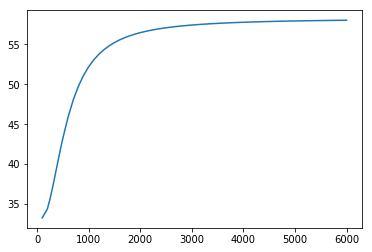

In [47]:
mat=LeerArchivo('https://janaf.nist.gov/tables/N-007.txt')
T=mat[:,0]
Cp=mat[:,1]
plt.plot(T,Cp)
plt.show()

In [48]:
T=T[3:16]  #para establecer las temperaturas deseadas dentro del arreglo generado arriba
y=Cp[3:16]
t=T/1000
n=len(T)
X=np.array([np.ones(n),t,t**2,t**3,1/t**2]).T
beta=np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
print(beta)
Cp_cal=X.dot(beta)
Cp_cal #Cp calculados

[ 16.10851352  75.89539116 -54.3872296   14.30775044   0.23942371]


array([36.97464325, 37.02885286, 38.57738883, 40.17680743, 41.73415859,
       43.20556533, 45.8218855 , 47.98172304, 49.71666727, 51.08664448,
       52.16384923, 53.02638265, 53.75543152])

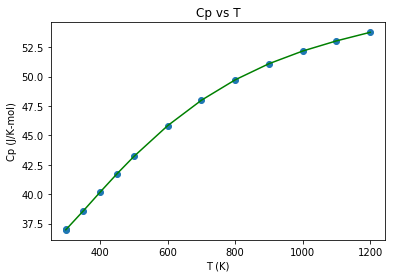

In [52]:
plt.scatter(T,y)
plt.plot(T,Cp_cal,color='green')
plt.xlabel('T (K)')
plt.ylabel('Cp (J/K-mol)')
plt.title('Cp vs T')
plt.show()